# 1. Importing the libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# 2. Loading the CSV file

Let's load the dataset and take a look at the first rows to get familiarized with the dataset.

In [2]:
df = pd.read_csv('../input/west-australia-weather-1944-2016/aus_weather.csv')

df.head()

,Year,Month,Day,rainfall_mm,min_temp_C,max_temp_C,daily_avg,daily_range,uv_MJ_m*m,Season
0,1944,5,1,0.0,NaN,NaN,0.0,0.0,NaN,3
1,1944,5,2,0.0,NaN,NaN,0.0,0.0,NaN,3
2,1944,5,3,0.0,NaN,NaN,0.0,0.0,NaN,3
3,1944,5,4,4.3,NaN,NaN,0.0,0.0,NaN,3
4,1944,5,5,0.0,NaN,NaN,0.0,0.0,NaN,3


# 3. Describing the dataset

Now, we will get some information about the dataset and analyze what has to be done before we start to deal with it.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26543 entries, 0 to 26542
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         26543 non-null  int64  
 1   Month        26543 non-null  int64  
 2   Day          26543 non-null  int64  
 3   rainfall_mm  26543 non-null  float64
 4   min_temp_C   26435 non-null  float64
 5   max_temp_C   26480 non-null  float64
 6   daily_avg    26543 non-null  float64
 7   daily_range  26543 non-null  float64
 8   uv_MJ_m*m    9390 non-null   float64
 9   Season       26543 non-null  int64  
dtypes: float64(6), int64(4)
memory usage: 2.0 MB


In [4]:
df.describe()

,Year,Month,Day,rainfall_mm,min_temp_C,max_temp_C,daily_avg,daily_range,uv_MJ_m*m,Season
count,26543.000000,26543.000000,26543.000000,26543.000000,26435.000000,26480.000000,26543.000000,26543.000000,9390.000000,26543.000000
mean,1980.164111,6.541160,15.730437,2.101281,12.104358,24.451828,18.224449,12.338684,18.967348,2.506499
std,20.979310,3.445064,8.800655,5.851269,4.736770,6.287806,5.203848,4.390402,8.726202,1.120981
min,1944.000000,1.000000,1.000000,0.000000,-1.300000,9.400000,0.000000,-20.600000,0.200000,1.000000
25%,1962.000000,4.000000,8.000000,0.000000,8.700000,19.400000,14.250000,9.200000,11.600000,1.000000
50%,1980.000000,7.000000,16.000000,0.000000,11.800000,23.200000,17.300000,12.400000,17.900000,3.000000
75%,1998.000000,10.000000,23.000000,0.600000,15.400000,28.800000,21.900000,15.300000,26.900000,4.000000
max,2016.000000,12.000000,31.000000,132.000000,28.700000,46.700000,36.800000,43.500000,37.100000,4.000000


We see that there are too many null values in the "uv_MJ_m*m" column. In a total of 26543 rows, just 9390 of them there're values. So, to not interfere in our analysis, we will drop that column:

In [5]:
df = df.drop('uv_MJ_m*m', axis=1)
df.head()

,Year,Month,Day,rainfall_mm,min_temp_C,max_temp_C,daily_avg,daily_range,Season
0,1944,5,1,0.0,NaN,NaN,0.0,0.0,3
1,1944,5,2,0.0,NaN,NaN,0.0,0.0,3
2,1944,5,3,0.0,NaN,NaN,0.0,0.0,3
3,1944,5,4,4.3,NaN,NaN,0.0,0.0,3
4,1944,5,5,0.0,NaN,NaN,0.0,0.0,3


The column was droped but we still have some null values left in the rest of the dataset, so let's drop them too:

In [6]:
df = df.dropna()
df.head()

,Year,Month,Day,rainfall_mm,min_temp_C,max_temp_C,daily_avg,daily_range,Season
33,1944,6,3,0.0,11.0,22.3,16.65,11.3,4
34,1944,6,4,0.0,12.2,23.4,17.80,11.2,4
35,1944,6,5,2.0,12.0,20.3,16.15,8.3,4
36,1944,6,6,3.3,7.4,18.7,13.05,11.3,4
37,1944,6,7,0.3,5.9,21.3,13.60,15.4,4


Now, we don't have any null value in our dataset, we can get some insights form it.

# 4. Geting insights

We will analyze the dataset searching for patterns such as average rain fall per month and per season, average temperature per season, which season has the bigger daily range, etc.

## 4.1 Statistics about the weather

### 4.1.1 Years

Firstly, we will analyse how many diferent years we have in our dataset:

In [7]:
df.Year.unique()

array([1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954,
       1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965,
       1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976,
       1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987,
       1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998,
       1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2012, 2013, 2014, 2015, 2016])

In [8]:
df.Year.unique().shape

(73,)

#### 4.1.1.1 Average temperature

We have 73 years in the dataset. Let's see if the average temperature increased ove the years. As the amount of years are big, we will take a closer look from the year 2000:

<AxesSubplot:xlabel='Year'>

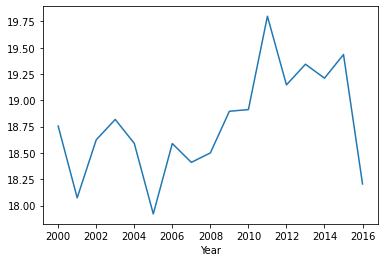

In [9]:
avg_temp_year = df.loc[df.Year >= 2000].groupby(['Year']).daily_avg.mean()
avg_temp_year.plot()

It seems that there was a big drop from 2014 to 2016. To make sure there is nothing wrong with these last years, we will take a closer look at them:

In [10]:
year_analysis = df.loc[df.Year >= 2014].groupby(['Year', 'Month']).daily_avg.count().to_frame()
year_analysis = year_analysis.rename(columns={'daily_avg': 'days'})
year_analysis['avg'] = df.loc[df.Year >= 2014].groupby(['Year', 'Month']).daily_avg.mean()
year_analysis

days        avg
Year Month                 
2014 1        31  25.383871
     2        28  25.937500
     3        31  23.925806
     4        30  20.040000
     5        31  16.546774
     6        30  13.551667
     7        31  13.461290
     8        31  15.882258
     9        30  16.335000
     10       31  18.148387
     11       30  19.446667
     12       31  22.275806
2015 1        31  25.761290
     2        28  25.878571
     3        31  23.048387
     4        30  19.530000
     5        31  15.112903
     6        30  15.483333
     7        31  13.917742
     8        31  14.298387
     9        30  16.011667
     10       31  19.625806
     11       30  21.966667
     12       31  23.059677
2016 1        31  25.717742
     2        29  25.050000
     3        31  23.724194
     4        30  19.775000
     5        31  15.161290
     6        30  13.658333
     7        31  12.516129
     8        31  12.487097
     9        30  12.636667
     10       31  15.656452
     11       30  20.335000
     12       31  21.977419

 The data seems to be right, with a similar amount of records in each month and we can see that the years 2015 and 2016 there was a drop in temperature, especially in autumn and summer. On the other hand, when comparing the last 16 years, the temperature has been increasing, reaching its peak in **2011**.

#### 4.1.1.2 Daily range

We are going to analyse now the average daily range of temperature over the last 16 years, in order to have a better understanding of how much the temperature varies during the day.

In [11]:
avg_daily_range = df.loc[df.Year >= 2000].groupby(['Year']).daily_range.mean()
avg_daily_range

Year
2000    12.872404
2001    13.458356
2002    13.146849
2003    12.805479
2004    13.185246
2005    12.439452
2006    13.571507
2007    13.021096
2008    12.590164
2009    13.210411
2010    14.138630
2011    12.432329
2012    13.030874
2013    12.752055
2014    12.855890
2015    13.025753
2016    12.318852
Name: daily_range, dtype: float64

<AxesSubplot:xlabel='Year'>

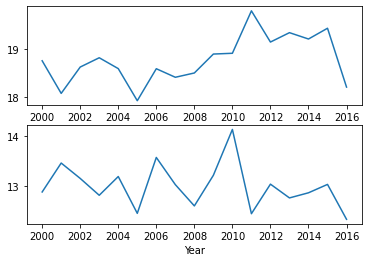

In [12]:
fig, axes = plt.subplots(nrows=2, ncols=1)

avg_daily_range.plot(ax=axes[1])
avg_temp_year.plot(ax=axes[0])

We can get some interesting insights here. In 2011, the hottest year, was also the year with the lowest variation of temperature. On the other hand, 2010, that was also an average hot year, the temperature varied more then 14º.

#### 4.1.1.3 Daily rain fall

Now, to finish the year analysis, let's look at the the amount of rain per year.

<AxesSubplot:xlabel='Year'>

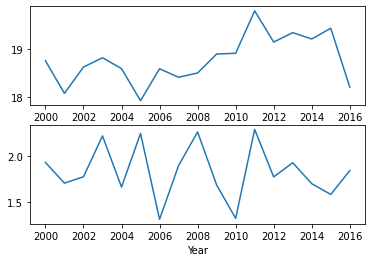

In [13]:
avg_rainfall = df.loc[df.Year >= 2000].groupby(['Year']).rainfall_mm.mean()

fig, axes = plt.subplots(nrows=2, ncols=1)

avg_temp_year.plot(ax=axes[0]) #average temperature per year
avg_rainfall.plot(ax=axes[1]) # avarege rain fall per year

We can see some similarities in some cases, for example in 2011 there was a considerable amount of rain. On the other hand, in 2010, which was also a hot year, the amount of rain was much lower. Also, let's take a look at the correlations between these data.

### 4.1.2 Months and Seasons

We have to keep in mind that the season column is a numerical column that represents the following:
* 1: Spring
* 2: Summer
* 3: Autumn
* 4: Winter

Let's look how is the average temperature per season and per month:

#### 4.1.2.1 Average temperature

In [14]:
avg_temp_season = df.groupby('Season').daily_avg.mean()
avg_temp_season

Season
1    16.792358
2    23.663393
3    19.400956
4    13.400396
Name: daily_avg, dtype: float64

In [15]:
#to help us see better, let's group by Season and by Month

avg_temp_month = df.groupby(['Season','Month']).daily_avg.mean()
avg_temp_month.rename(index={1: 'Spring', 2: 'Summer', 3: 'Autumn', 4: 'Winter'}, level=0)

Season  Month
Spring  9        14.527279
        10       16.503459
        11       19.355863
Summer  1        24.407570
        2        24.750890
        12       21.956684
Autumn  3        22.821666
        4        19.295255
        5        16.075798
Winter  6        13.964777
        7        12.957324
        8        13.297807
Name: daily_avg, dtype: float64

As expected, Summer has the highest average temperature (23,66) and Winter has the lowest (13,4). Taking a deeper look, the months **12, 1 and 2** have the **highest temperature**, while the months 6, 7 and 8 have the lowest.

Let's plot the values to visualize it better:

<AxesSubplot:xlabel='Season,Month'>

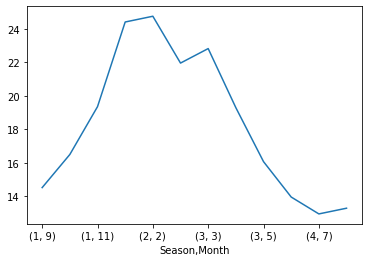

In [16]:
avg_temp_month.plot()

#### 4.1.2.2 Daily range

Similar to the year, let's analyse the daily range over the months.

<AxesSubplot:xlabel='Month'>

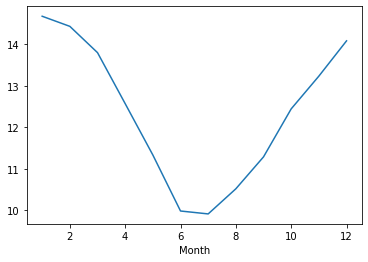

In [17]:
df.groupby(['Month']).daily_range.mean().plot()

#### 4.1.2.3 Daily rain fall

Now, we will explore the average daily rain fall per month.

<AxesSubplot:xlabel='Month'>

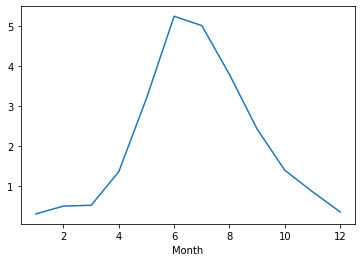

In [18]:
df.groupby(['Month']).rainfall_mm.mean().plot()

We can notice here that during the cold months, there are more rains then the hot months.

To finish our analyses, we will see if there are correlation between the calumns.

## 4.2 Correlations

In [19]:
df.corr()

,Year,Month,Day,rainfall_mm,min_temp_C,max_temp_C,daily_avg,daily_range,Season
Year,1.000000,-0.010991,-0.000138,-0.032293,0.084970,0.083335,0.089983,0.028637,0.001156
Month,-0.010991,1.000000,0.010361,0.032049,-0.336073,-0.319211,-0.349554,-0.097832,-0.327211
Day,-0.000138,0.010361,1.000000,0.024214,-0.006476,-0.013222,-0.011052,-0.012383,0.010400
rainfall_mm,-0.032293,0.032049,0.024214,1.000000,-0.067025,-0.329182,-0.231825,-0.413736,0.204728
min_temp_C,0.084970,-0.336073,-0.006476,-0.067025,1.000000,0.739305,0.911580,-0.021460,-0.242992
max_temp_C,0.083335,-0.319211,-0.013222,-0.329182,0.739305,1.000000,0.950773,0.657350,-0.332649
daily_avg,0.089983,-0.349554,-0.011052,-0.231825,0.911580,0.950773,1.000000,0.391465,-0.314922
daily_range,0.028637,-0.097832,-0.012383,-0.413736,-0.021460,0.657350,0.391465,1.000000,-0.221953
Season,0.001156,-0.327211,0.010400,0.204728,-0.242992,-0.332649,-0.314922,-0.221953,1.000000
